In [1]:
import tensorflow as tf
import numpy as np
from HyperParameters import HP
import train_utility as tu


Using TensorFlow backend.


In [2]:
batch_z = tf.keras.Input(shape=(HP.latent_dim,))
initial_state = tf.keras.layers.Dense(units=(2*HP.dec_hidden_size), activation='tanh', name = "decoder_init_stat")(batch_z)
h_0, c_0 = tf.split(initial_state, num_or_size_splits=2, axis = 1)
latent_to_hidden_state_model = tf.keras.Model(inputs=batch_z, outputs=initial_state)

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
decoder_input = tf.keras.Input(shape=(1, 5 + HP.latent_dim))
initial_h_input = tf.keras.Input(shape=(HP.dec_hidden_size,))
initial_c_input = tf.keras.Input(shape=(HP.dec_hidden_size,))
# now the LSTM
decoderLSTM = tf.keras.layers.LSTM(HP.dec_hidden_size, recurrent_dropout=HP.rec_dropout, 
                                    return_sequences=True, return_state=True, name = "LSTM_decoder")

# creation of the LSTM
decoder_output, _, _ = decoderLSTM(decoder_input, initial_state = [h_0, c_0])

# dense to output. THe dimention is, as explained in the paper equal to 3 + 6*M
# 6 times M= number of mixture 
output_dimention = (3 + HP.M * 6)
distribution_output = tf.keras.layers.Dense(output_dimention, name = "output_layer")(decoder_output)

# Now we load the weights from the trained model
generator = tf.keras.models.Model([batch_z, decoder_input], distribution_output)
generator.summary()
generator.load_weights("wheight.h5", by_name = True)
generator.build(tf.TensorShape([1, None])) 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 1, 261)            0         
_________________________________________________________________
LSTM_decoder (LSTM)          [(None, 1, 512), (None, 5 1585152   
_________________________________________________________________
output_layer (Dense)         (None, 1, 123)            63099     
Total params: 1,648,251
Trainable params: 1,648,251
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 1, 261)            0         
_________________________________________________________________
LSTM_decoder (LSTM)          [(None, 1, 512), (None, 5 1585152   
_________________________________________________________________


In [ ]:
"""
function that generate point by point the sketch
"""
def generate_text(model, latent_varoable, temperature = 1.):
    # Evaluation step (generating text using the learned model)
    points_generated = []
    starting_point = np.array([0,0,1,0,0])
    previous_point = starting_point

    model.reset_states()
    for i in range(HP.max_seq_length):
        new_input = tf.concatenate(previus_point, latent_variable)
        predictions = model(new_input)
        # remove the batch dimension
        predictions = tf.squeeze(predictions, 0)

        q, pi, mux, muy, sigmax, sigmay, ro = tu.find_distribution_parameter(predictions, temperature = temperature)
        
        # sample from the bivariate normals
        covariance_matrix = np.matrix([sigmax**2, ro*sigmax*sigmay], [ ro*sigmax*sigmay, sigmay**2])
        newdelta = np.random.multivariate_normal(mean = np.array(mux, muy), cov = covariance_matrix)
        

        # using the GMM to predict dx, dy and categorical to predice p_i
        

        # We pass the predicted word as the next input to the model
        # along with the previous hidden state
        input_eval = tf.expand_dims([predicted_id], 0)

        text_generated.append(idx2char[predicted_id])

    return (start_string + ''.join(text_generated))

In [1]:
import data_Manager
datas = data_Manager.Data()
x = datas.train

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt
import draw

In [3]:
data = x[0]
min_x, max_x, min_y, max_y = draw.get_bounds(data)

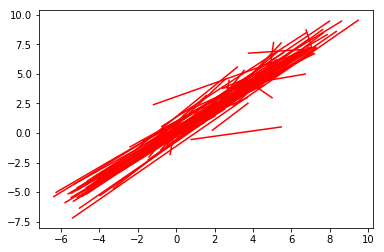

In [4]:
abs_x = 0
abs_y = 0
next_x = 0
next_y = 0
i = 0
colors = ["r","b", "y", "g"]
previus_p_1 = 1
for point in data:
    next_x = abs_x + point[0]
    next_y = abs_y + point[1]
    if previus_p_1:
        p_0 = [abs_x, abs_y]
        p_1 = [next_x, next_y]
        color = colors[i]
        i = (i + 1)%len(colors)
        plt.plot(p_0, p_1, "r")
    previus_p_1 = point[2]
    abs_x = next_x
    abs_y = next_y

In [5]:
data

array([[-0.11787089, -0.31432238,  1.        ,  0.        ,  0.        ],
       [ 0.07858059, -1.49303129,  1.        ,  0.        ,  0.        ],
       [ 0.55006416,  0.31432238,  1.        ,  0.        ,  0.        ],
       [ 0.78580594,  1.02154772,  1.        ,  0.        ,  0.        ],
       [ 0.86438653, -0.55006416,  1.        ,  0.        ,  0.        ],
       [ 0.39290297, -0.11787089,  1.        ,  0.        ,  0.        ],
       [ 2.00380515,  0.        ,  1.        ,  0.        ,  0.        ],
       [ 1.21799921, -0.19645149,  1.        ,  0.        ,  0.        ],
       [ 0.47148356,  0.11787089,  1.        ,  0.        ,  0.        ],
       [ 0.19645149, -0.23574178,  1.        ,  0.        ,  0.        ],
       [ 0.27503208, -0.82509624,  1.        ,  0.        ,  0.        ],
       [ 0.19645149, -0.11787089,  1.        ,  0.        ,  0.        ],
       [ 0.35361267,  1.21799921,  1.        ,  0.        ,  0.        ],
       [ 0.        ,  3.57541703,  1. 

In [13]:
data

array([[-0.11787089, -0.31432238,  1.        ,  0.        ,  0.        ],
       [ 0.07858059, -1.49303129,  1.        ,  0.        ,  0.        ],
       [ 0.55006416,  0.31432238,  1.        ,  0.        ,  0.        ],
       [ 0.78580594,  1.02154772,  1.        ,  0.        ,  0.        ],
       [ 0.86438653, -0.55006416,  1.        ,  0.        ,  0.        ],
       [ 0.39290297, -0.11787089,  1.        ,  0.        ,  0.        ],
       [ 2.00380515,  0.        ,  1.        ,  0.        ,  0.        ],
       [ 1.21799921, -0.19645149,  1.        ,  0.        ,  0.        ],
       [ 0.47148356,  0.11787089,  1.        ,  0.        ,  0.        ],
       [ 0.19645149, -0.23574178,  1.        ,  0.        ,  0.        ],
       [ 0.27503208, -0.82509624,  1.        ,  0.        ,  0.        ],
       [ 0.19645149, -0.11787089,  1.        ,  0.        ,  0.        ],
       [ 0.35361267,  1.21799921,  1.        ,  0.        ,  0.        ],
       [ 0.        ,  3.57541703,  1. 